# **POGIL Activities: Classification with County Health Rankings Data**

# Overview
These activities guide learners through classification concepts using real health data. The focus is on understanding when and how to use classification, rather than mathematical derivations.

# Resources & Credits
This activity uses data from
[County Health Rankings & Roadmaps](https://www.countyhealthrankings.org/health-data/methodology-and-sources/data-documentation)


## **Activity 1: Introduction to Classification Through Health Outcomes**

**Learning Objectives**
- Understand what makes a problem suitable for classification
- Learn to prepare data for classification
- Develop intuition for feature selection
- Compare different classification approaches

**POGIL Roles**
- Manager: Keeps team on task and manages time
- Reader: Reads problems and instructions
- Data Scientist: Runs analyses and creates visualizations
- Presenter: Shares findings with class


**Part 1: Exploring Binary Classification (45 minutes)**


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Initial Exploration (15 minutes)**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the data
health_data = pd.read_csv('/content/drive/My Drive/Teaching/CSC108/CHR_2024_Tutorial_Data.csv')

#Create binary outcome: Counties with above/below median life expectancy
median_life_exp = health_data['Life_Expectancy'].median()
health_data['High_Life_Exp'] = health_data['Life_Expectancy'] > median_life_exp


**Questions:**
   - What makes life expectancy suitable for classification?
   - How might choosing different thresholds affect our classification?
   - What factors might predict life expectancy?


**2. Feature Selection (15 minutes)**

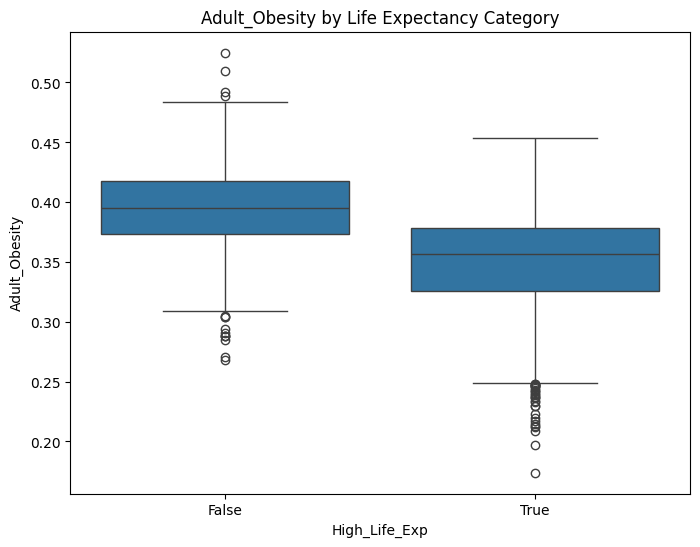

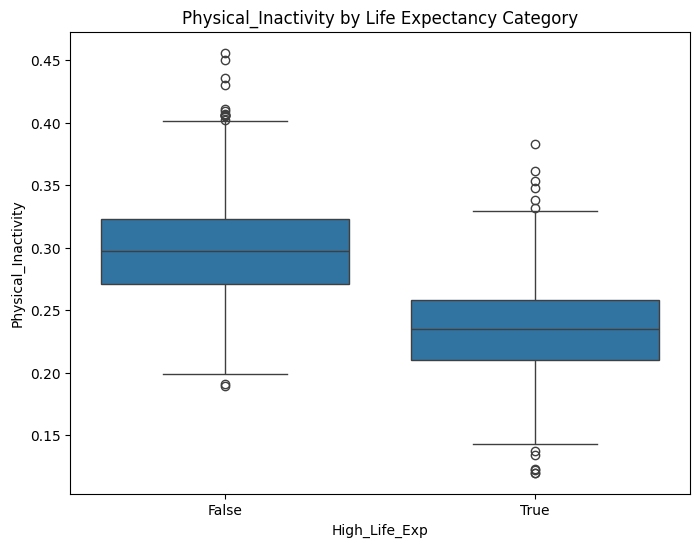

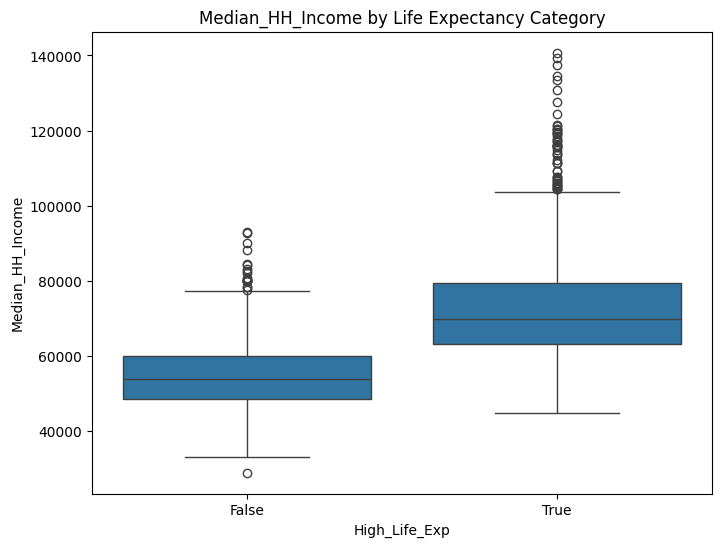

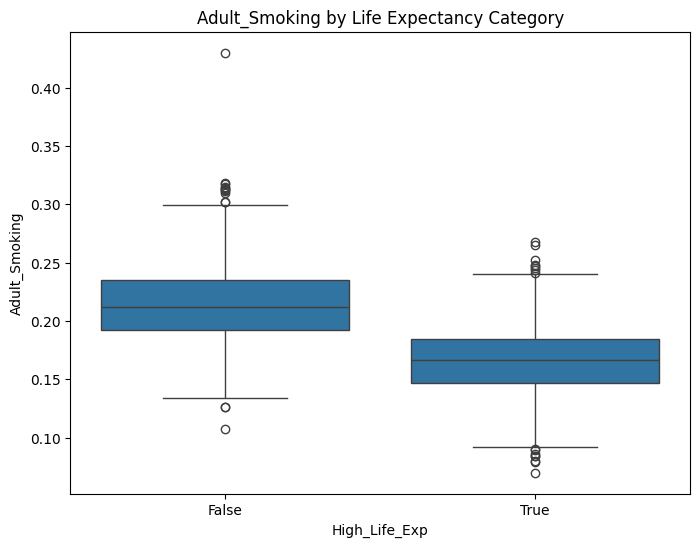

In [4]:
#Examine potential predictive features
potential_features = ['Adult_Obesity', 'Physical_Inactivity',
                        'Median_HH_Income', 'Adult_Smoking']

#Create visualization of relationships
for feature in potential_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=health_data, x='High_Life_Exp', y=feature)
  plt.title(f'{feature} by Life Expectancy Category')


**Questions:**
   - Which features show clear differences between classes?
   - Why might some features be more predictive than others?
   - How could we combine multiple features?


**3. Model Comparison (15 minutes)**

Teams compare classification approaches using no-code tools:
   - Decision trees in Orange Data Mining
   - Logistic regression in Weka
   - Visual classification in Blockly-DS


**Part 2: Multi-class Health Profiles (45 minutes)**

Setup:
Create health profiles based on multiple factors:


In [5]:
def create_health_profile(row):
    if row['Adult_Obesity'] > 0.35 and row['Physical_Inactivity'] > 0.25:
        return 'High Risk'
    elif row['Adult_Obesity'] <= 0.30 and row['Physical_Inactivity'] <= 0.20:
        return 'Low Risk'
    else:
        return 'Moderate Risk'

health_data['Health_Profile'] = health_data.apply(create_health_profile, axis=1)

Activities:

1. Profile Analysis (15 minutes)
   - Examine distribution of health profiles
   - Identify characteristic features of each profile
   - Discuss implications for public health

2. Feature Engineering (15 minutes)
   - Create combined features (e.g., lifestyle index)
   - Normalize and scale features
   - Handle missing data

3. Model Building (15 minutes)
   - Train a decision tree classifier
   - Visualize the decision boundaries
   - Interpret the results


##**Activity 2: Real-world Application (60 minutes)**

**Part 1: Predictive Model Development**

**1. Data Preparation (20 minutes)**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Select features and target
features = ['Adult_Obesity', 'Physical_Inactivity', 'Median_HH_Income',
               'Adult_Smoking', 'Food_Env_Index']
X = health_data[features]
y = health_data['Health_Profile']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**2. Model Implementation (20 minutes)**

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#Train model
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train_scaled, y_train)

#Evaluate
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

    High Risk       1.00      1.00      1.00       277
     Low Risk       1.00      1.00      1.00        28
Moderate Risk       1.00      1.00      1.00       185

     accuracy                           1.00       490
    macro avg       1.00      1.00      1.00       490
 weighted avg       1.00      1.00      1.00       490



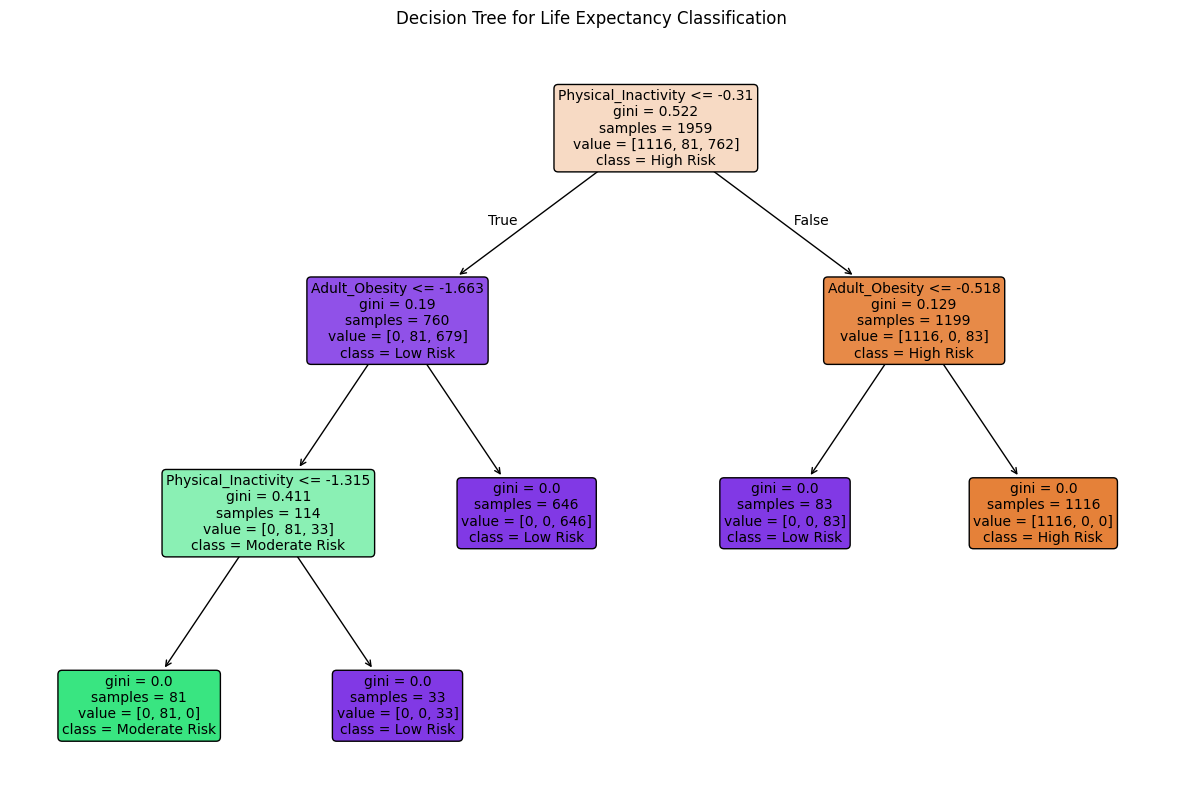

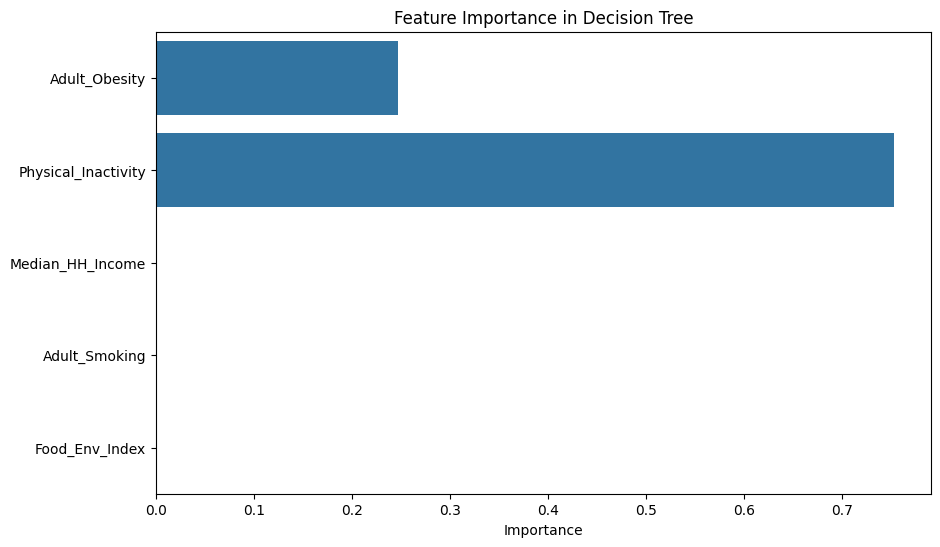


Decision path for Example County:
- Decision: Is Physical_Inactivity > -0.310?
- Decision: Is Adult_Obesity > -0.518?
- Final prediction: High Life Expectancy


In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np


# Function to visualize decision tree
def plot_decision_tree(clf, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf,
             feature_names=feature_names,
             class_names=class_names,
             filled=True,
             rounded=True,
             fontsize=10)
    plt.title("Decision Tree for Life Expectancy Classification")
    plt.show()


# Plot decision tree visualization
plot_decision_tree(clf,
                  feature_names=features,
                  class_names=['High Risk', 'Moderate Risk', 'Low Risk'])


# Create feature importance visualization
def plot_feature_importance(clf, feature_names):
    importance = clf.feature_importances_

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=feature_names)
    plt.title("Feature Importance in Decision Tree")
    plt.xlabel("Importance")
    plt.show()

plot_feature_importance(clf, features)

# Function to explain decision path for a specific county
def explain_decision_path(clf, X, feature_names, county_name):
    # Get decision path
    path = clf.decision_path(X.reshape(1, -1))
    node_indicator = path.toarray()[0]

    # Get all nodes in the decision path
    node_index = node_indicator.nonzero()[0]

    print(f"\nDecision path for {county_name}:")
    for node_id in node_index:
        if clf.tree_.feature[node_id] != -2:  # not a leaf node
            feature = feature_names[clf.tree_.feature[node_id]]
            threshold = clf.tree_.threshold[node_id]

            if X[clf.tree_.feature[node_id]] <= threshold:
                threshold_sign = "<="
            else:
                threshold_sign = ">"

            print(f"- Decision: Is {feature} {threshold_sign} {threshold:.3f}?")
        else:  # leaf node
            print(f"- Final prediction: {'High' if clf.predict([X])[0] else 'Low'} Life Expectancy")

# Example usage for a specific county
example_county = X_scaled[0]  # First county in dataset
explain_decision_path(clf, example_county, features, "Example County")


**3. Results Interpretation (20 minutes)**
   - Analyze model performance
   - Identify most important features
   - Discuss model limitations


**Part 2: Ethical Considerations (30 minutes)**
Discussion Topics:
1. Bias in health data
2. Implications of misclassification
3. Privacy considerations
4. Resource allocation impacts

**Assessment Activities**

Formative Assessment
1. Group Presentations:
   - Teams present their classification approaches
   - Explain feature selection decisions
   - Discuss model performance

2. Peer Review:
   - Teams evaluate each other's models
   - Suggest improvements
   - Share alternative approaches

Summative Assessment

1. Project-based Assessment:
   - Design a classification system for a new health outcome
   - Document feature selection and preprocessing
   - Compare multiple classification approaches
   - Present findings and recommendations

2. Reflection Questions:
   - How does classification aid decision-making in healthcare?
   - What are the limitations of your model?
   - How would you improve the model with additional data?


Extension Activities

1. Advanced Classification Techniques:
   - Random Forests
   - Support Vector Machines
   - Comparison of model performances

2. Cross-validation and Model Tuning:
   - K-fold cross-validation
   - Hyperparameter optimization
   - Model selection criteria

3. Interactive Visualization:
   - Decision boundary visualization
   - Feature importance plots
   - Confusion matrix analysis
